<a href="https://colab.research.google.com/github/helmitareq/Breast-Guard-Using-CNN-For-Cancer-Detection/blob/main/CNN_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install image

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 91.5 MB/s eta 0:00:00
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=d64bd45919817e26e02b6fc2318a078852ccc56e1874b3889a8b6f085c10db92
  Stored in directory: /root/.cache/pip/wheels/70/0c/a4/7cfa53a5c6225c2db2bfec08e782b43d0f25fdae2e995b69be
Successfully built image


In [56]:
from PIL import Image as PILImage
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import cv2
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
import matplotlib.pyplot as plt
import io
from google.colab import files

# **Import Data**

In [2]:
def load_images(directory):
    images = []
    for filename in os.listdir(directory):
        img = cv2.imread(os.path.join(directory,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        img = np.array(img)/255.0
        images.append(img)
    return images

In [3]:
cancer_image = load_images('/content/drive/MyDrive/Project CNN/Cancer')
no_cancer_image = load_images('/content/drive/MyDrive/Project CNN/Negative')

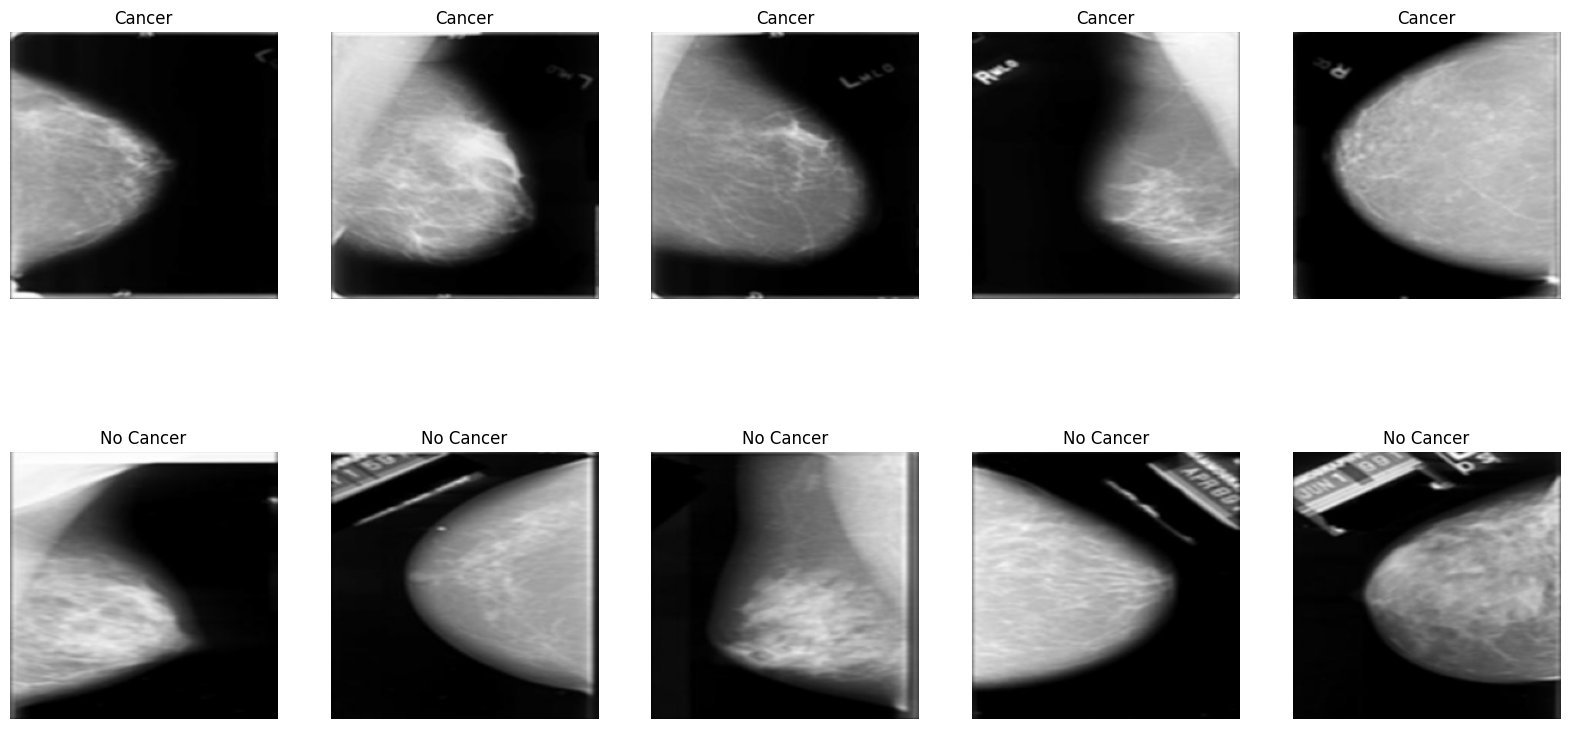

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(20, 10))

for i in range(5):
    ax[0, i].imshow(cancer_image[i])
    ax[0, i].axis('off')
    ax[0, i].set_title('Cancer')

for i in range(5):
    ax[1, i].imshow(no_cancer_image[i])
    ax[1, i].axis('off')
    ax[1, i].set_title('No Cancer')

plt.show()

# **Labeling**

In [5]:
def assign_label(cancer_image, no_cancer_image):
    cancer_labels = np.ones(len(cancer_image))
    no_cancer_labels = np.zeros(len(no_cancer_image))
    return cancer_labels, no_cancer_labels
cancer_labels, no_cancer_labels = assign_label(cancer_image, no_cancer_image)

In [6]:
cancer_labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [7]:
no_cancer_labels

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [8]:
data = cancer_image + no_cancer_image
labels = np.concatenate((cancer_labels, no_cancer_labels))

In [9]:
labels

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [10]:
data[0].shape

(224, 224, 3)

# **Modeling & Evaluation**

In [11]:
x =np.array(data)
y = np.array(labels)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [13]:
train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test = tf.data.Dataset.from_tensor_slices((x_test, y_test))

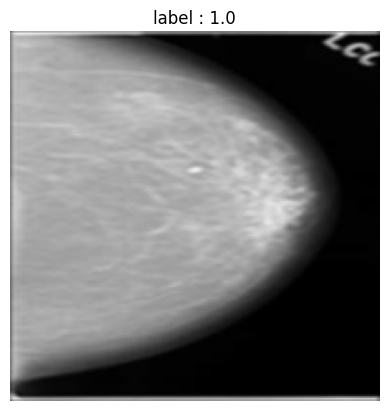

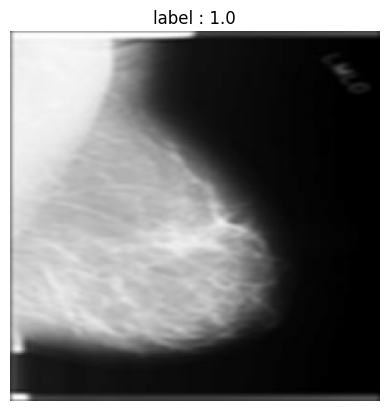

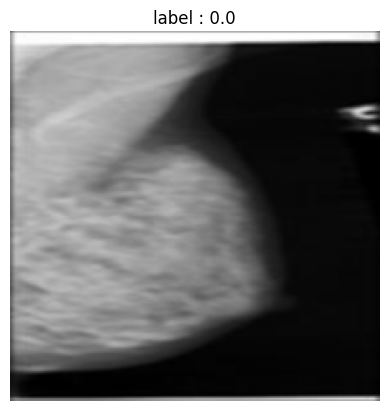

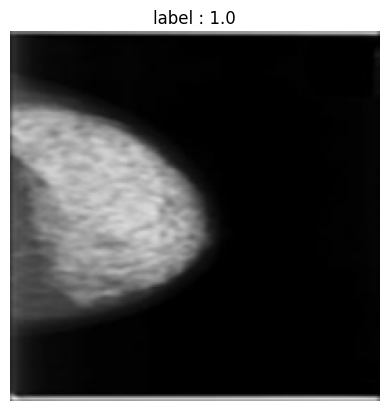

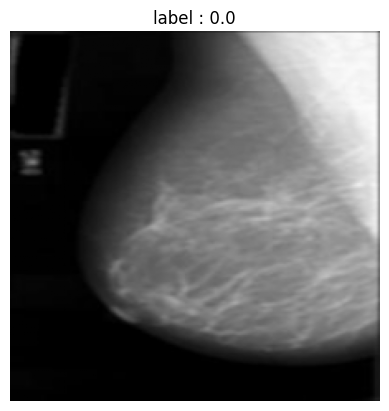

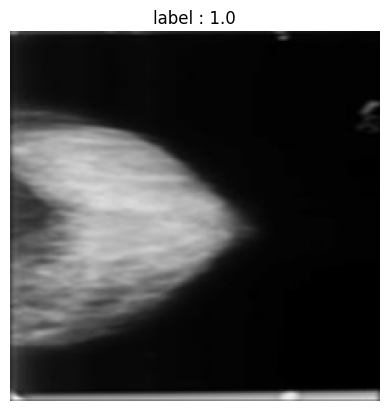

In [14]:
for Image, label in train.take(6):
    plt.figure()
    plt.imshow(Image.numpy())
    plt.title('label : {}'.format(label.numpy()))
    plt.axis('off')
    plt.show()

In [15]:
total_size = train.reduce(0, lambda count, _: count + 1).numpy()
validation_size = int(0.1 * total_size)
train = train.skip(validation_size)
validation = train.take(validation_size)

In [16]:
batch_size = 32
train = train.batch(batch_size)
validation = validation.batch(batch_size)
test = test.batch(batch_size)

In [76]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), padding='valid'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

In [77]:
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_23 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_15 (Flatten)                 │ (None, 394272)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 64)                  │      25,233,472 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,234,433 (96.26 MB)

 Trainable params: 25,234,433 (96.26 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = model.fit(
    train,
    validation_data=validation,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping]
)

Epoch 1/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 221ms/step - accuracy: 0.5694 - loss: 4.1068 - val_accuracy: 0.8615 - val_loss: 0.3587
Epoch 2/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7939 - loss: 0.4633 - val_accuracy: 0.8769 - val_loss: 0.3253
Epoch 3/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.8897 - loss: 0.3220 - val_accuracy: 0.8923 - val_loss: 0.2397
Epoch 4/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8932 - loss: 0.2794 - val_accuracy: 0.9692 - val_loss: 0.1710
Epoch 5/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9295 - loss: 0.2021 - val_accuracy: 0.8923 - val_loss: 0.1890
Epoch 6/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.9212 - loss: 0.1923 - val_accuracy: 0.9538 - val_loss: 0.1366
Epoch 7/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9565 - loss: 0.1349 - val_accuracy: 0.9692 - val_loss: 0.0942
Epoch 8/50
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.9663 - loss: 0.1141 - val_accuracy: 0.9846 - 

In [79]:
final_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]
print(f"Training Accuracy: {final_accuracy:.4f}")
print(f"Validation Accuracy: {final_val_accuracy:.4f}")

Training Accuracy: 0.9915
Validation Accuracy: 0.9846


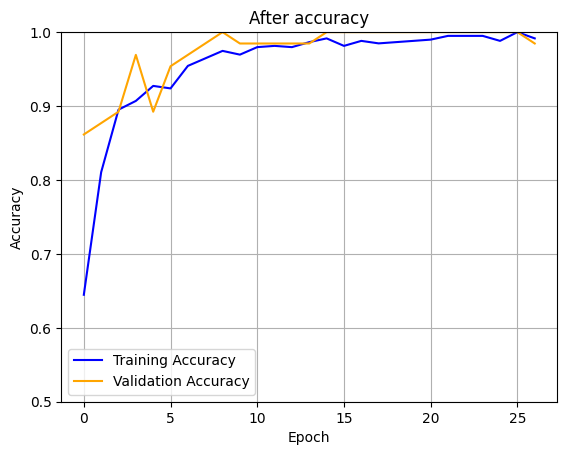

In [81]:
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title('After accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [82]:
model.save('/content/drive/MyDrive/Project CNN/model.h5')

# **Testing Model**

In [83]:
def load_uploaded_image(image_bytes):
    img = PILImage.open(io.BytesIO(image_bytes))
    img = img.resize((224, 224))
    img_array = np.array(img)
    img_array = img_array / 255.0
    return img_array

def predict_image(image_bytes):
    img_array = load_uploaded_image(image_bytes)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        return 'Breast Cancer'
    else:
        return 'No Breast Cancer'

Saving 13.jpg to 13.jpg


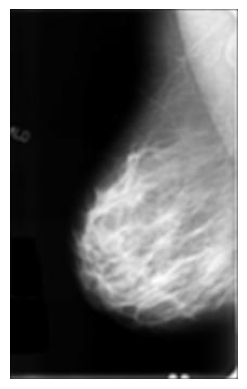

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
Prediction: Breast Cancer


In [84]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = PILImage.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

prediction = predict_image(image_bytes)
print('Prediction:', prediction)

Saving 17.jpg to 17.jpg


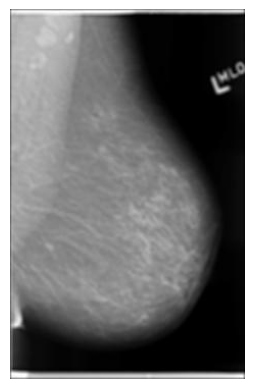

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Breast Cancer


In [85]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = PILImage.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

prediction = predict_image(image_bytes)
print('Prediction:', prediction)

Saving 18.jpg to 18.jpg


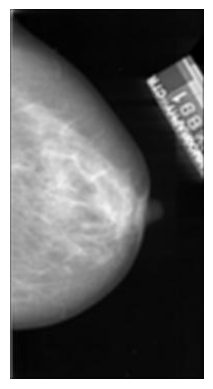

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: No Breast Cancer


In [86]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = PILImage.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

prediction = predict_image(image_bytes)
print('Prediction:', prediction)

Saving 51.jpg to 51.jpg


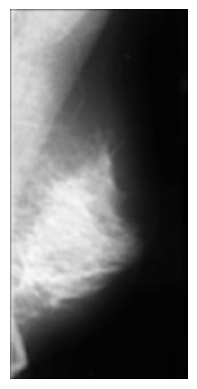

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Prediction: No Breast Cancer


In [87]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = PILImage.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

prediction = predict_image(image_bytes)
print('Prediction:', prediction)

Saving 407.jpg to 407.jpg


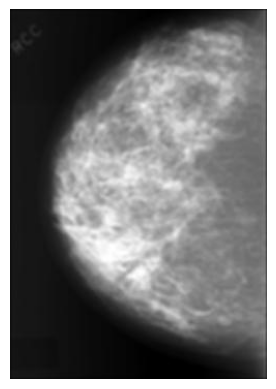

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: Breast Cancer


In [91]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
image_bytes = uploaded[file_name]
img = PILImage.open(io.BytesIO(image_bytes))

plt.imshow(img)
plt.axis('off')
plt.show()

prediction = predict_image(image_bytes)
print('Prediction:', prediction)